In [26]:
# Load your dataset
data = pd.read_csv('test_main.csv')
#print(data)

data.fillna(0, inplace=True)

# Now, the NaN values are replaced with 0
print(data)

years = data['Year'].unique()
companies = data['Company'].unique()
ratings = ['-2', '-1', '0', '1', '2']

# Initialize the 3D array with zeros
three_d_array = np.zeros((len(companies), len(years), len(ratings)))

# Fill the 3D array with data
for i, company in enumerate(companies):
    for j, year in enumerate(years):
        for k, rating in enumerate(ratings):
            subset = data[(data['Year'] == year) & (data['Company'] == company)]
            if not subset.empty:
                count = subset[rating].values[0]
                three_d_array[i, j, k] = count

# Check the shape of the 3D array
print(three_d_array.shape)
print(three_d_array)

                                       Company  -2  -1     0     1    2  Year
0  National Association of Manufacturers (NAM)   8  16  16.0   9.0  1.0  2021
1                       US Chamber of Commerce  24  34  21.0  14.0  1.0  2021
2  Western States Petroleum Association (WSPA)  17   9   5.0  14.0  0.0  2021
3  National Association of Manufacturers (NAM)   8  16  11.0   1.0  2.0  2022
4                       US Chamber of Commerce  40  34   8.0   9.0  3.0  2022
5  Western States Petroleum Association (WSPA)  12   8   0.0   0.0  0.0  2022
6  National Association of Manufacturers (NAM)  18  25  14.0   2.0  1.0  2023
7                       US Chamber of Commerce  32  16  12.0   6.0  0.0  2023
8  Western States Petroleum Association (WSPA)  10   8   6.0   0.0  0.0  2023
(3, 3, 5)
[[[ 8. 16. 16.  9.  1.]
  [ 8. 16. 11.  1.  2.]
  [18. 25. 14.  2.  1.]]

 [[24. 34. 21. 14.  1.]
  [40. 34.  8.  9.  3.]
  [32. 16. 12.  6.  0.]]

 [[17.  9.  5. 14.  0.]
  [12.  8.  0.  0.  0.]
  [10.  8.  6.

In [27]:
print(three_d_array[0, 1])

[ 8. 16. 11.  1.  2.]


In [8]:
def func1():
    Year = int(input("Year? "))
    Company = int(input("Company? "))

    print(Year, Company)

    data_out = three_d_array[Year, Company]
    print(data_out)

#func1()


0 2
[17.  9.  5. 14. nan]


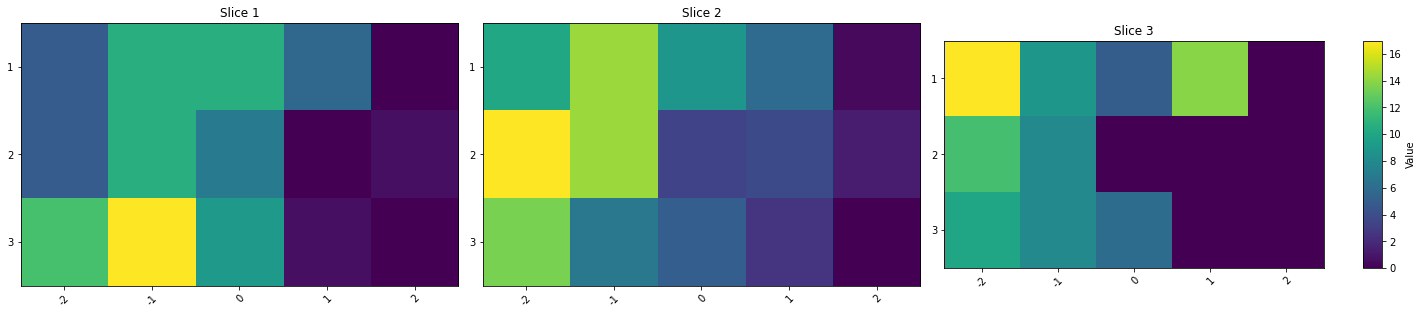

In [75]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Plot each 2D slice as a heatmap
for i, ax in enumerate(axes):
    im = ax.imshow(three_d_array[i], cmap='viridis', interpolation='nearest')
    ax.set_title(f'Slice {i+1}')
    
    # Modify the x-axis ticks and labels to range from -2 to 2
    ax.set_xticks(np.arange(0, three_d_array.shape[2]))
    ax.set_xticklabels(np.arange(-2, 3))  # Change tick labels here
    
    ax.set_yticks(np.arange(0, three_d_array.shape[0]))
    ax.set_yticklabels(np.arange(1, three_d_array.shape[0] + 1))
    
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Add a colorbar to the side of the heatmap
divider = make_axes_locatable(axes[-1])
cax = divider.append_axes("right", size="5%", pad=0.55)
cbar = plt.colorbar(im, cax=cax, orientation='vertical')
cbar.set_label('Value')

# Remove unnecessary space between subplots
plt.subplots_adjust(wspace=0.2)

plt.tight_layout()
plt.show()


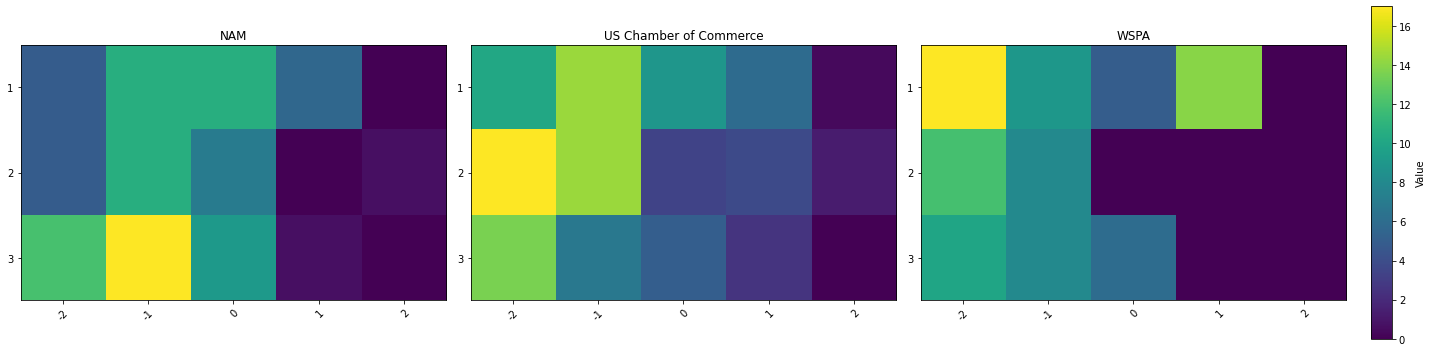

In [80]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

# Create a grid of subplots with 1 row and 4 columns
fig = plt.figure(figsize=(20, 5))
gs = gridspec.GridSpec(1, 4, width_ratios=[1, 1, 1, 0.05])  # The last column is for the colorbar

subplot_labels = ["NAM", "US Chamber of Commerce", "WSPA"]

# Plot each 2D slice as a heatmap
for i, ax in enumerate([plt.subplot(gs[j]) for j in range(3)]):
    im = ax.imshow(three_d_array[i], cmap='viridis', interpolation='nearest')
    ax.set_title(subplot_labels[i])
    
    # Modify the x-axis ticks and labels to range from -2 to 2
    ax.set_xticks(np.arange(0, three_d_array.shape[2]))
    ax.set_xticklabels(np.arange(-2, 3))  # Change tick labels here
    
    ax.set_yticks(np.arange(0, three_d_array.shape[0]))
    ax.set_yticklabels(np.arange(1, three_d_array.shape[0] + 1))
    
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Add a colorbar to the side of the heatmap
cax = plt.subplot(gs[3])  # The last column is for the colorbar
cbar = plt.colorbar(im, cax=cax, orientation='vertical')
cbar.set_label('Value')

plt.tight_layout()
plt.show()


<ipython-input-103-e2fa4afbb45e>:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


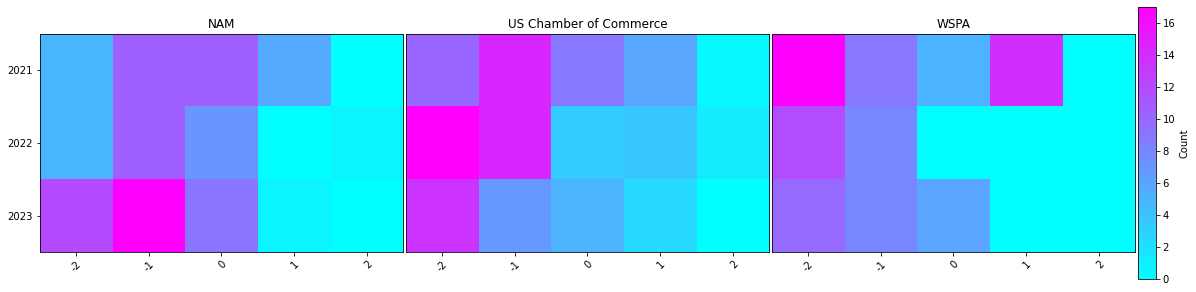

In [103]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

# Create a grid of subplots with 1 row and 4 columns
fig = plt.figure(figsize=(20, 5))
gs = gridspec.GridSpec(1, 4, width_ratios=[1, 1, 1, 0.05])  # The last column is for the colorbar

subplot_labels = ["NAM", "US Chamber of Commerce", "WSPA"]

# Plot each 2D slice as a heatmap
for i, ax in enumerate([plt.subplot(gs[j]) for j in range(3)]):
    im = ax.imshow(three_d_array[i], cmap='cool', interpolation='nearest')
    ax.set_title(subplot_labels[i])
    
    # Modify the x-axis ticks and labels to range from -2 to 2
    ax.set_xticks(np.arange(0, three_d_array.shape[2]))
    ax.set_xticklabels(np.arange(-2, 3))  # Change tick labels here
    
    if i == 0:  # Only show y-axis labels on the first subplot
        ax.set_yticks(np.arange(0, three_d_array.shape[0]))
        ax.set_yticklabels(["2021", "2022", "2023"])  # Change y-axis labels here
    else:
        ax.set_yticks([])  # Remove y-axis ticks and labels for other subplots
    
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Add a colorbar to the side of the heatmap
cax = plt.subplot(gs[3])  # The last column is for the colorbar
cbar = plt.colorbar(im, cax=cax, orientation='vertical')
cbar.set_label('Count')

# Adjust the spacing between subplots using the gridspec
gs.update(wspace=0.009, hspace=0.5)

plt.tight_layout()
plt.show()